# Filtro de Média Geométrica
O filtro de média geométrica é um filtro espacial não-linear de suavização de imagens e sinais. Consiste na aplicação da fórmula $$\hat{f}(x, y) = [\prod _{(s,t) \in S_{xy}} f(s,t)]^{\frac{1}{mn}} $$ na imagem, de forma que a intensidade de dado pixel seja a média geométrica dos valores dos pixels em determinada vizinhança $m \times n$.

### Implementação da Função

1. Criar na imagem original uma borda de largura $\dfrac{m}{2}$ e altura  $\dfrac{n}{2}$
2. Criar um np.ndarray (`img_filtered`) com as dimensões originais da imagem para guardar o resultado do filtro.
3. Gerar um loop varrendo todos os pixels da imagem
4. A cada pixel `img[i][j]`, fazer o produto de todos os pixels da vizinhança $m \times n$ onde ``img[i][j]`` é o pixel central e guardar em `product_region`
6. Atribuir `product_region` para `img_filtered[i][j]`
7. Retornar `img_filtered`

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def geometric_mean(img, m, n):
    '''Calcula a média geométrica na imagem img com um filtro de tamanho m por n.

        Parâmetros
        ----------
        img : numpy array.
            Imagem a ser filtrada.
        m : uint
            Número de linhas para o filtro.
        n : uint
            Número de colunas para o filtro.
        Return
        -------
        img_filtered : numpy array, mesmo tamanho que img
            Imagem filtrada
    '''

    num_rows, num_cols = img.shape

    # Cria imagem com margem proporcional ao filtro desejado
    half_row_size = m//2
    half_col_size = n//2
    img_padded = np.pad(img, ((half_row_size,half_row_size),
                              (half_col_size,half_col_size)),
                        mode='symmetric')

    # Aplicação do filtro de média geométrica
    img_filtered = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            product_region = 1
            for s in range(m):
                for t in range(n):
                    # Pequena alteração na fórmula para impedir overflow durante
                    # a multiplicação, considera a propriedade da exponencial de 
                    # que (a * b)^n == a^n * b^n
                    product_region *= (img_padded[row+s, col+t])**(1./(m*n))
            img_filtered[row, col] = product_region

    return img_filtered

In [10]:
# Leitura da imagem
img = plt.imread('cameraman.tiff')

# Aplicação do filtro de suavização usando média geométrica
img_smooth_1 = geometric_mean(img, m=3, n=3)
img_smooth_2 = geometric_mean(img, m=2, n=5)
img_smooth_3 = geometric_mean(img, m=5, n=2)

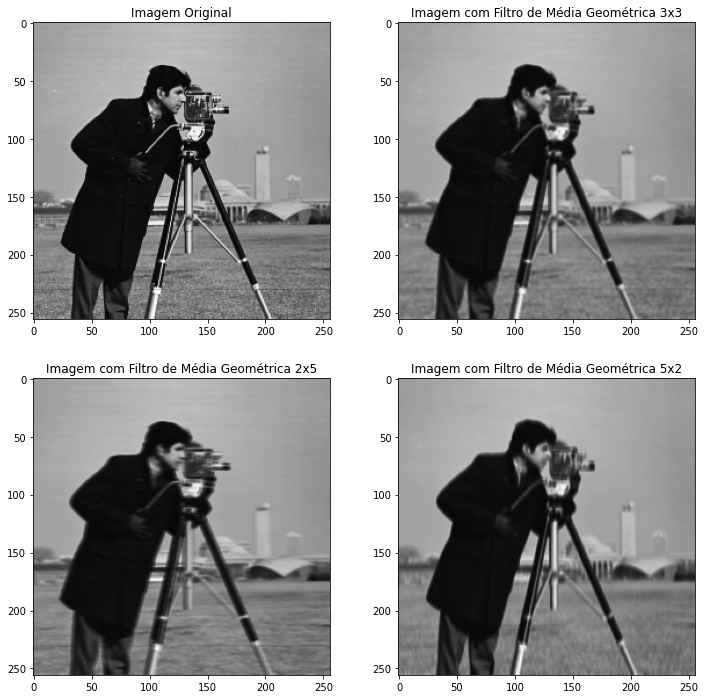

In [11]:
# Apresentação da imagem original e das geradas com os filtros
plt.figure(figsize=[12, 12])
plt.subplot(2, 2, 1)
plt.title("Imagem Original")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 2)
plt.title("Imagem com Filtro de Média Geométrica 3x3")
plt.imshow(img_smooth_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 3)
plt.title("Imagem com Filtro de Média Geométrica 2x5")
plt.imshow(img_smooth_2, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 4)
plt.title("Imagem com Filtro de Média Geométrica 5x2")
plt.imshow(img_smooth_3, cmap='gray', vmin=0, vmax=255)


# Filtro de Mediana

O filtro de mediana é um filtro espacial não-linear de suavização de imagens e sinais. Consiste na aplicação da fórmula $$ \hat{f}(x,y) = \underset{(s,t)\in S_{xy}}{\mathrm{mediana}} [f(s,t)] $$ na imagem, de forma que a intensidade de dado pixel seja a mediana dos valores dos pixels em determinada vizinhança $m \times n$.

### Implementação da função:

1. Criar na imagem original uma borda de largura $\dfrac{m}{2}$ e altura  $\dfrac{n}{2}$
2. Criar um np.ndarray (`img_filtered`) com as dimensões originais da imagem para guardar o resultado do filtro.
3. Gerar um loop varrendo todos os pixels da imagem
4. A cada pixel `img[i][j]`, inserir todos os pixels da vizinhança $m \times n$ onde ``img[i][j]`` é o pixel central para dentro do vetor `med_array`
5. Ordenar `med_array` e escolher o valor central do vetor, isto é, a mediana
6. Inserir a mediana encontrada em `img_filtered[i][j]`
7. Retornar `img_filtered`

In [12]:
def median(img,m,n):
    '''Calcula a mediana da imagem img com um filtro de tamanho m x n.

        Parâmetros
        ----------
        img : numpy array.
            Imagem a ser filtrada.
        m : uint
            Número de linhas para o filtro.
        n : uint
            Número de colunas para o filtro.
        Return
        -------
        img_filtered : numpy array, mesmo tamanho que img
            Imagem filtrada
    '''
    
    num_row, num_col = img.shape
    
    # Cria imagem com margem proporcional ao filtro desejado
    half_row_size = m//2
    half_col_size = n//2
    img_padded = np.pad(img, ((half_row_size,half_row_size),
                              (half_col_size,half_col_size)),
                        mode='symmetric')
    
    # Aplicação do filtro
    img_filtered = np.zeros((num_row,num_col))
    for row in range(num_row-1):
        for col in range(num_col-1):
            
            med_array = []
            for k in range(m):
                for y in range(n):
                    med_array.append(img_padded[row+k][col+y])
            med_array = np.sort(med_array)
            median = len(med_array)//2
            
            # Se a quantidade de valores é par, o cálculo da médiana
            # é a média aritmética dos valores do meio, se for impar
            # é o valor central
            if(len(med_array)%2 == 0):
                img_filtered[row][col] = ((med_array[median-1]*0.5)+(med_array[median]*0.5)).astype('uint8')
            else:
                img_filtered[row][col] = med_array[median]
    return img_filtered

In [13]:
# Leitura da imagem e aplicação do filtro
img = plt.imread('cameraman.tiff')
img_median_1 = median(img,5,5)
img_median_2 = median(img,3,10)
img_median_3 = median(img,10,3)

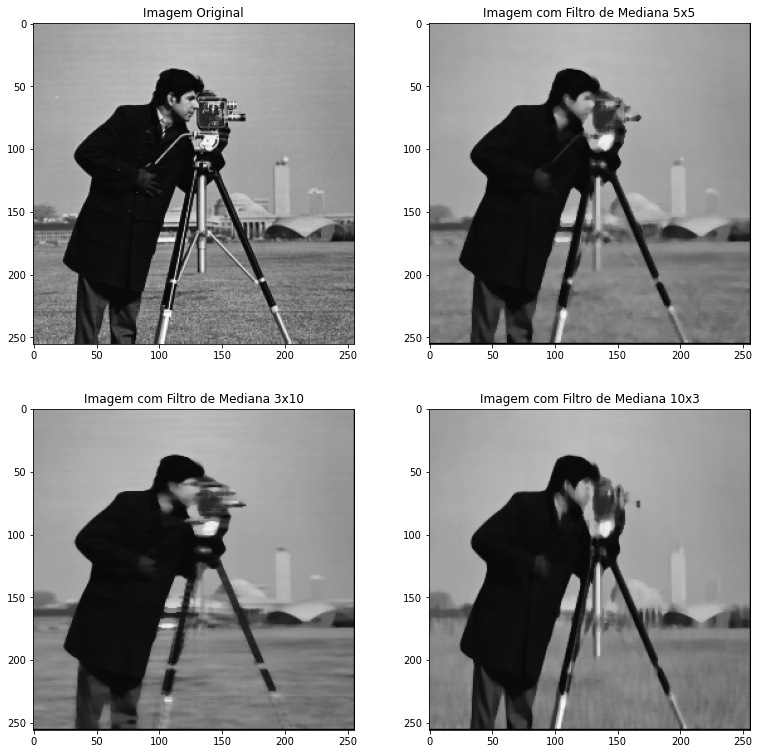

In [14]:
# Apresentação da imagem original e das geradas com os filtros
plt.figure(figsize = [13,13])
plt.subplot(2,2,1)
plt.title("Imagem Original")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 2)
plt.title("Imagem com Filtro de Mediana 5x5")
plt.imshow(img_median_1, cmap='gray', vmin=0, vmax=255)

plt.subplot(2, 2, 3)
plt.imshow(img_median_2, cmap='gray', vmin=0, vmax=255)
plt.title("Imagem com Filtro de Mediana 3x10")

plt.subplot(2, 2, 4)
plt.title("Imagem com Filtro de Mediana 10x3")
plt.imshow(img_median_3, cmap='gray', vmin=0, vmax=255)